# Enzymath
## Modelado matemático de cinética enzimática 🧑🏽‍🏫✍️📈

### 0.1 ¿Cómo derivar un modelo matemático?

- Identifica las variables relevantes de un fenómeno.
- Ilustra en un diagrama las interacciones entre las variables.
- Determina los parámetros involucrados en las interacciones.
- Traduce el diagrama a ecuaciones que capturen la dinámica de las variables y sus interacciones.
- Analiza el módelo o simplifícalo con ciertas suposiciones.

### 0.2 ¿Para qué podemos usar un modelo matemático?

- Abstraer lo más importante de un sistema.
- Formalizar nuestro entendimiento/intución.
- Predecir el comportamiento de un sistema que motive experimentos.
- Estimar los parámetros que caracterizan un sistema.
- Saber cómo diseñar un experimento y qué medir.
- Generalizar, en otras palabras, simular escenarios más allá de lo conocido/realidad.

### 0.3 ¿Cómo derivar un modelo de cinética enzimática?

Después de escribir las ecuaciones dinámicas (diferenciales), nuestro objetivo será manipularlas hasta encontrar las ecuaciones más simples posibles.
Esto require que, tras hacer varias suposiciones sensatas, depengan del mínimo número de variables y de parámetros.
Para ello declararemos parámetros "macroscópicos" que reunan varios parámetros "microscópicos".
Luego usaremos datos experimentales para estimar estos parámetros macroscópicos.

Algunas consideraciones son:
- Debemos asegurar la conservación de materia.
- Asumiremos que la enzima total (libre y unida a substratos) es constante, pero esto se puede cambiar si queremos.
- Asumiremos que hay mucho más sustrato(s) que enzima, por que el sustrato no es el reactivo limitante.
- Asumiremos un quasi-equilibrio, donde las concentraciones de ciertas variables no cambia (un equilibrio dinámico).

In [1]:
# Importar paquetes de Julia
using Catalyst                      # Para escribir reacciones químicas de forma simple.
using OrdinaryDiffEq                # Para usar métodos de Ecuaciones Diferenciales Ordinarias.
using Plots                         # Para graficar.
using Latexify                      # Para imprimir ecuaciones en formato de LaTeX/Markdown.

### 1. Michaelis-Menten - *la vieja confiable* 👴🏼📜👵🏼

Este modelo es el más usado en cinética enzimatica al representar un mecanismo muy simple: una sola enzima $[E]$ con un solo sitio de ligación, se une a un sustrato $[S]$ para formar un intermediario $[SE]$ que permite la conversión del sustrato en producto $[P]$. 
El mecanismo se ilustra con la reacción
$$
[S] + [E] \xleftrightarrow[k_-]{k_+} [SE] \xrightarrow[]{k_p} [P] + [E]
$$
donde hay tres tasas de reacción:
La tasa de asociación de la enzima al sustrato $k_+$, la tasa de disociación del intermediario en enzima y sustrato $k_-$, y la tasa de formación del producto $k_p$.

Para derivar la ecuación de Michaelis-Menten, partimos de la idea de que todos los elementos se mezclan en un medio homogeneo, por lo cual podemos usar el *principio de acción de masas* para escribir la tasa de cambio de cada uno de los elementos ($[S]$, $[E]$, $[SE]$ y $[P]$).
Usando el diagrama de reacciones, podemos ver que algunas reacciones reducen la cantidad de los elementos, mientras que otras la incrementan.
Usando el principio de acción de masas, sabemos que la tasa a la cual occurre una reacción depende de la concentración de los reactivos.
Y si se trata del encuentro de dos o más reactivos, del producto de sus concentraciones.
Por lo tanto,
\begin{align}
\frac{d[S]}{dt} & = - k_+ [S] [E] + k_- [SE] \\
\frac{d[E]}{dt} & = - k_+ [S] [E] + (k_- + k_p) [SE] \\
\frac{d[SE]}{dt} & = k_+ [S] [E] - (k_- + k_p) [SE] \\
\frac{d[P]}{dt} & = k_p [SE]
\end{align}
es el sistema de ecuaciones diferenciales que describen el cambio instantaneo de las concentraciones.
Estas ecuaciones pueden ser resueltas numericamente para visualizar el cambio en el tiempo de las concentraciones desde una condición inicial.
Para ello, solo se debe especificar el valor de las tasas de reacción, $k_+$, $k_-$ y $k_p$, y las condiciones iniciales de los reactivos $[S]$, $[E]$, $[SE]$, y $[P]$.

El objetivo del modelo de Michaelis-Menten es simplicar las ecuaciones anteriores a través de suposiciones razonables acerca de la dinámica enzimática y así facilitar la medición experimental de los parámetros cinéticos.

La primera de estas suposiciones, es que la cantidad de enzima es constante en el tiempo, y llamada $[E_T]$.
Así, la enzima solo se puede encontrar en forma libre $[E]$ o unida al sustrato $[SE]$.
Por lo tanto,
\begin{equation}
[E_T] = [E] + [SE] .
\end{equation}

Otra manera de decir que la enzima total $[E_T]$ es constante, es decir que la derivada de la expresión anterior es igual a cero, y por lo tanto las derivadas de $[E]$ y $[SE]$ son cero también,
\begin{align}
\frac{d[E_T]}{dt} & = \frac{d[E]}{dt} - \frac{d[SE]}{dt} = 0 \\
 & = \frac{d[E]}{dt} = \frac{d[SE]}{dt} = 0 .
\end{align}

Una implicación de lo anterior es que la ecuación diferencial de $[SE]$ al ser igual a cero, nos permite resolverla para aislar $[SE]$.
Experimentalmente, es complicado medir $[SE]$ y $[E]$ a lo largo del tiempo, por lo cual expresar estas variables en terminos de variables que si podemos medir experimentalmente, como lo son $[S]$ y $[P]$, es muy útil.
Por lo tanto,
\begin{align}
0 & = k_+ [S] [E] - (k_- + k_p) [SE] \\
(k_- + k_p) [SE] & = k_+ [S] [E]\\
[SE] & = \frac{k_+}{k_- + k_p} [S] [E] .
\end{align}

Ahora podemos sustituir esta expresión en la de enzima total $[E_T]$, para tener una ecuación de la cual aislar la enzima libre $[E]$,
\begin{align}
[E_T] & = [E] \left(1 + \frac{k_+}{k_- + k_p} [S] \right) \\
[E] & = \frac{[E_T]}{\left(1 + \frac{k_+}{k_- + k_p} [S] \right)} .
\end{align}
Con estas simplificaciones, hemos llegado a expresiones solo en términos de variables que podemos medir experimentalmente.

La segunda suposición del modelo de Michaelis-Menten, es que comparado con la cantidad de enzima, el sustrato es mucho más abundante, de forma que su concentración es aproximadamente constante.
Otra forma de decirlo, es que $[E]$ es el reactivo limitante, y por lo tanto el que determina la velocidad de generación de producto $[P]$.
Con esta suposición, podemos dejar de lado la ecuación diferencial del sustrato y enfocarnos en la del producto.
Donde, finalmente, podemos ver que el producto $[P]$ es una función del intermediario, $[SE]$. 
Al sustituir la expresiones de $[SE]$ y $[E]$ que encontramos anteriormente llegamos a la bien conocida ecuación de Michaelis-Menten, 
\begin{align}
\frac{d[P]}{dt} & = k_p \frac{k_+}{k_- + k_p} [S] [E] \\
 & = \frac{k_+}{k_- + k_p} \frac{k_p [E_T] [S]}{1 + \frac{k_+}{k_- + k_p} [S]} \\
 & = \frac{1}{K_m} \frac{k_p [E_T] [S]}{1 + \frac{1}{K_m} [S]} \\
 & = \frac{V_{max} [S]}{K_m + [S]} ,
\end{align}
la cual dice que la velocidad de generación del producto $[P]$, es únicamente función de la concentración del sustrato $[S]$, y dos nuevas constantes cinéticas definidas como
\begin{align}
V_{max} & = k_p [E_T] \\
K_m & = \frac{k_- + k_p}{k_+} .
\end{align}

Convencionalmente, la ecuación de Michaelis-Menten es escrita como
\begin{equation}
V = \frac{V_{max} [S]}{K_m + [S]} .
\end{equation}

Al analizar la ecuación de Michaelis-Menten, vemos que mientras el numerador incrementa la velocidad de reacción con la cantidad de sustrato $[S]$, el denominador decrece la velocidad conforme $[S]$ se incrementa.
Estos efectos opuestos causan que la velocidad se estabilize en una constante donde una mayor concentración de sustrato ya no incrementa la velocidad de reacción. 
De hecho, la máxima velocidad de reacción es precisamente el valor de $V_{max}$, porque cuando $[S] \gg K_m$, el efecto de $K_m$ es mínimo por lo cual $\frac{[S]}{K_m + [S]} \approx 1$, y la ecuación de Michaelis-Menten se reduce a $V \approx V_{max}$.
Luego, $K_m$ es comunmente conocida como la capacidad media, pues cuando la concentración de sustrato es igual a $K_m$, $[S] = K_m$, la ecuación de Michaelis-Menten nos dice que $V = \frac{V_{max}}{2}$.

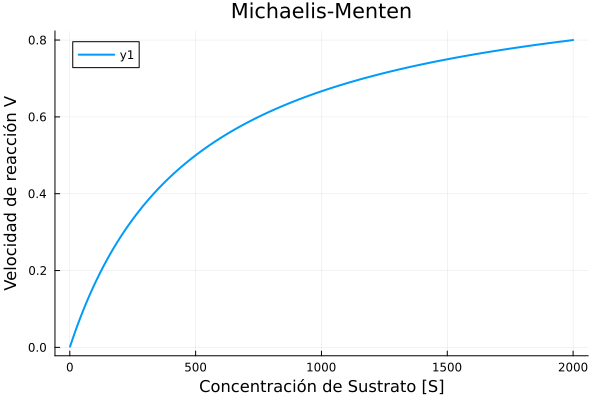

In [6]:
# Ejemplo.
# Michaelis-Menten.

# Definir función
function MM(S, V_max, K_m)
    return V_max .* S ./ (S .+ K_m)
end

# Establecer parámetros y cantidades de sustrato
V_max = 1;
K_m = 500;
# Establecer cantidades de sustrato
S = 1:2000;

# Evaluar el modelo
V = MM(S, V_max, K_m)

# Graficar la curva cinética
plot(S, V, lw=2, xlabel="Concentración de Sustrato [S]", ylabel="Velocidad de reacción V", title="Michaelis-Menten")

### Una enzima con dos sustratos y un producto - *la ligación* 🤝🔗

Muchas reacciones enzimáticas consisten en *ligar* más de un tipo de sustrato.
La unión de dos sustratos es el tipo de más común de ligación.
Si $[S_1]$ y $[S_2]$ indican el primer y segundo sustrato, $[E]$ es la cantidad de enzima y la $[P]$ de producto, el mecanismo de reacción es,
$$
[S_1] + [E] \xleftrightarrow[k_-^{(1)}]{k_+^{(1)}} [S_1 E] \xleftrightarrow[k_-^{(12)}]{k_+^{(12)}[S_2]} [S_1 S_2 E] \xrightarrow[]{k_p} [P] + [E]\\
[S_2] + [E] \xleftrightarrow[k_-^{(2)}]{k_+^{(2)}} [S_2 E] \xleftrightarrow[k_-^{(21)}]{k_+^{(21)}[S_1]} [S_1 S_2 E] \xrightarrow[]{k_p} [P] + [E] ,
$$
donde $[S_1 E]$ y $[S_2 E]$ son los intermediarios que se forman inicialmente, y $[S_1 S_2 E]$ el intermediario en el que ya se han unido los dos sustratos.
Nota cómo existen dos rutas para llegar a este intermediario último.
Estas rutas alternativas pueden tener, por lo tanto, distintas tasas de reacción.
Hemos usado una notación como la de Michaelis-Menten para estas tasas, pero indicando la secuencia de asociación en el superíndice.
Por ejemplo, $k_+^{(12)}$ indica la asociación de $[S_1]$ primero y $[S_2]$ segundo.
El resto de tasas deben ser leidas de forma similar.

Nuevamente, usando el principio de acción de masas, podemos derivar el sistema de ecuaciones diferenciales que describen el cambio instantaneo de concentraciones que ocurren en el tiempo,
\begin{align}
\frac{d[S_1]}{dt} & = - k_+^{(1)} [S_1] [E] + k_-^{(1)} [S_1 E] \\
\frac{d[S_2]}{dt} & = - k_+^{(2)} [S_2] [E] + k_-^{(2)} [S_2 E] \\
\frac{d[E]}{dt} & = - \left( k_+^{(1)} [S_1] + k_+^{(2)} [S_2] \right) [E] + k_-^{(1)} [S_1 E] + k_-^{(2)} [S_2 E] + k_p [S_1 S_2 E] \\
\frac{d[S_1 E]}{dt} & = k_+^{(1)} [S_1] [E] - \left( k_-^{(1)} + k_+^{(12)}[S_2] \right) [S_1 E] + k_-^{(12)} [S_1 S_2 E] \\
\frac{d[S_2 E]}{dt} & = k_+^{(2)} [S_2] [E] - \left( k_-^{(2)} + k_+^{(21)}[S_1] \right) [S_2 E] + k_-^{(21)} [S_1 S_2 E] \\
\frac{d[S_1 S_2 E]}{dt} & = k_+^{(12)}[S_2] [S_1 E] + k_+^{(21)}[S_1] [S_2 E] - \left( k_-^{(12)} + k_-^{(21)} + k_p \right) [S_1 S_2 E] \\
\frac{d[P]}{dt} & = k_p [S_1 S_2 E] 
\end{align}
Evidentemente, con más sustratos e intermediarios, hay más ecuaciones y terminos más complejos que en el modelo de Michaelis-Menten.
Sin embargo, cualitativamente nada ha cambiado: 
Algunas reacciones incrementa la concentración de un reactivo y mientras que otras la reducen.

Los pasos para derivar el modelo cinético de acumulación de producto $[P]$ como función de los sustratos $[S_1]$ y $[S_2]$ involucra ecuaciones más largas que en Michaelis-Menten, pero parte de las mismas suposiciones.
Primero, que la enzima total $[E_T]$ es constante en el tiempo,
\begin{equation}
[E_T] = [E] + [S_1 E] + [S_2 E] + [S_1 S_2 E] .
\end{equation}
Por lo tanto,
\begin{align}
\frac{d[E_T]}{dt} & = \frac{d[E]}{dt} + \frac{d[S_1 E]}{dt} + \frac{d[S_2 E]}{dt} + \frac{d[S_1 S_2 E]}{dt} = 0 \\
\frac{d[E_T]}{dt} & = \frac{d[E]}{dt} = \frac{d[S_1 E]}{dt} = \frac{d[S_2 E]}{dt} = \frac{d[S_1 S_2 E]}{dt} = 0 .
\end{align}

De las ecuaciones de los intermediarios iniciales $[S_1 E]$ y $[S_2 E]$ podemos encontrar que,
\begin{align}
0 & = k_+^{(1)} [S_1] [E] - \left( k_-^{(1)} + k_+^{(12)}[S_2] \right) [S_1 E] + k_-^{(12)} [S_1 S_2 E] \\
0 & = k_+^{(2)} [S_2] [E] - \left( k_-^{(2)} + k_+^{(21)}[S_1] \right) [S_2 E] + k_-^{(21)} [S_1 S_2 E] \\
\end{align}
se simplifica a 
\begin{align}
[S_1 E] & = \frac{k_+^{(1)} [S_1] [E] + k_-^{(12)} [S_1 S_2 E]}{k_-^{(1)} + k_+^{(12)}[S_2]} \\
[S_2 E] & = \frac{k_+^{(2)} [S_2] [E] + k_-^{(21)} [S_1 S_2 E]}{k_-^{(2)} + k_+^{(21)}[S_1]}
\end{align}

Luego, en la ecuación del intermediario final $[S_1 S_2 E]$,
\begin{align}
0 & = k_+^{(12)}[S_2] [S_1 E] + k_+^{(21)}[S_1] [S_2 E] - \left( k_-^{(12)} + k_-^{(21)} + k_p \right) [S_1 S_2 E] 
\end{align}

podemos sustituir las ecuaciones de $[S_1 E]$ y $[S_2 E]$ que recién encontramos,
\begin{align}
0 & = k_+^{(12)}[S_2] \left( \frac{k_+^{(1)} [S_1] [E] + k_-^{(12)} [S_1 S_2 E]}{k_-^{(1)} + k_+^{(12)}[S_2]} \right) \\
& + k_+^{(21)}[S_1] \left( \frac{k_+^{(2)} [S_2] [E] + k_-^{(21)} [S_1 S_2 E]}{k_-^{(2)} + k_+^{(21)}[S_1]} \right) \\
& - \left( k_-^{(12)} + k_-^{(21)} + k_p \right) [S_1 S_2 E] ,
\end{align}
y aislar $[S_1 S_2 E]$, para tenerlo únicamente en función de los sustratos $[S_1]$, $[S_2]$ y la enzima $[E]$,

\begin{align}
[S_1 S_2 E] & = \frac{ \frac{k_+^{(12)} k_+^{(1)} }{k_-^{(1)} + k_+^{(12)}[S_2]} + \frac{k_+^{(21)}k_+^{(2)} }{k_-^{(2)} + k_+^{(21)}[S_1]} }{ k_-^{(12)} + k_-^{(21)} + k_p - \frac{k_+^{(12)} k_-^{(12)} [S_2]}{k_-^{(1)} + k_+^{(12)}[S_2]} - \frac{k_+^{(21)} k_-^{(21)} [S_1]}{k_-^{(2)} + k_+^{(21)}[S_1]} } [S_1] [S_2] [E] \\
& = f([S_1], [S_2]) [E] \\
\end{align}
Ciertamente esta es una expresión complicada, que por motivos de claridad hemos simplificado definiendo

\begin{align}
f([S_1], [S_2]) & = \frac{ \frac{k_+^{(12)} k_+^{(1)} }{k_-^{(1)} + k_+^{(12)}[S_2]} + \frac{k_+^{(21)}k_+^{(2)} }{k_-^{(2)} + k_+^{(21)}[S_1]} }{ k_-^{(12)} + k_-^{(21)} + k_p - \frac{k_+^{(12)} k_-^{(12)} [S_2]}{k_-^{(1)} + k_+^{(12)}[S_2]} - \frac{k_+^{(21)} k_-^{(21)} [S_1]}{k_-^{(2)} + k_+^{(21)}[S_1]} } [S_1] [S_2] .
\end{align}
Ahora, sustituigamos esta nueva expresión de $[S_1 S_2 E]$ en la de los intermediarios iniciales
\begin{align}
[S_1 E] & = \left( \frac{k_+^{(1)} [S_1] + k_-^{(12)} f([S_1], [S_2])}{k_-^{(1)} + k_+^{(12)}[S_2]} \right) [E] \\
[S_2 E] & = \left( \frac{k_+^{(2)} [S_2] + k_-^{(21)} f([S_1], [S_2])}{k_-^{(2)} + k_+^{(21)}[S_1]} \right) [E] .
\end{align}
Con lo que llegamos a expresiones que únicamente son función de los sustratos $[S_1]$, $[S_2]$ y la enzima $[E]$.

Para expresar $[E]$ como función de $[S_1]$ y $[S_2]$, sustituimos las funciones de $[S_1 E]$, $[S_2 E]$, y $[S_1 S_2 E]$ en la ecuación de $[E_T]$ y simplificamos,
\begin{align}
[E_T] & = [E] \left( 1 + \frac{k_+^{(1)} [S_1] + k_-^{(12)} f([S_1], [S_2])}{k_-^{(1)} + k_+^{(12)}[S_2]} + \frac{k_+^{(2)} [S_2] + k_-^{(21)} f([S_1], [S_2])}{k_-^{(2)} + k_+^{(21)}[S_1]} + f([S_1], [S_2]) \right) \\
[E] & = \frac{[E_T]}{ 1 + \frac{k_+^{(1)} [S_1] + k_-^{(12)} f([S_1], [S_2])}{k_-^{(1)} + k_+^{(12)}[S_2]} + \frac{k_+^{(2)} [S_2] + k_-^{(21)} f([S_1], [S_2])}{k_-^{(2)} + k_+^{(21)}[S_1]} + f([S_1], [S_2]) } .
\end{align}

Finalmente, al sustituir las funciones de $[S_1 S_2 E]$ y $[E]$ en la ecuación diferencial del producto $[P]$, la generación de producto está dada por
\begin{align}
\frac{d[P]}{dt} & = V = k_p f([S_1], [S_2]) [E] \\
& = \frac{k_p [E_T] f([S_1], [S_2])}{ 1 + \frac{k_+^{(1)} [S_1] + k_-^{(12)} f([S_1], [S_2])}{k_-^{(1)} + k_+^{(12)}[S_2]} + \frac{k_+^{(2)} [S_2] + k_-^{(21)} f([S_1], [S_2])}{k_-^{(2)} + k_+^{(21)}[S_1]} + f([S_1], [S_2]) } \\
& = \frac{V_{max} f([S_1], [S_2])}{ 1 + \frac{k_+^{(1)} [S_1] + k_-^{(12)} f([S_1], [S_2])}{k_-^{(1)} + k_+^{(12)}[S_2]} + \frac{k_+^{(2)} [S_2] + k_-^{(21)} f([S_1], [S_2])}{k_-^{(2)} + k_+^{(21)}[S_1]} + f([S_1], [S_2]) }
\end{align}
donde hemos definido la velocidad máxima de generación de producto $V_{max}$ como,

\begin{align}
V_{max} & = k_p [E_T] .
\end{align}

Sin duda, esta es una expresión más complicada que la ecuación de Michaelis-Menten.
Pero es suficiente notar que ésta es una función de los dos sustratos $[S_1]$ y $[S_2]$.
La ecuación es exacta, pero puede simplificarse al hacer suposiciones adicionales respecto a las tasas de reacción.


In [ ]:
# Ejemplo.
# Catálisis de una enzima con dos sustratos y un producto.

### 2.1 Ecuación de Hill (ligación única) - *la historia de la hemoglobina* 👩🏻‍⚕️💉🩸

Otro modelo importante en enzimología es la ecuación de Hill.
Éste, busca describir la asociación de varias moleculas del mismo sustrato a una sola enzima.
Historicamente, este modelo fue importante para explicar la cinética de ligación de la hemoglobina, que transposta oxigeno a través de los globulos rojos en el torrente sanguíneo.
Con este modelo se explicó cómo la ligación de una molécula de sustrato afectaba la afinidad de la siguiente molecula de sustrato.
La ecuación de Hill captura este mecanismo.

Primero derivaremos la ecuación de Hill cuando las moléculas de sustrato se ligan a la enzima al mismo tiempo.
Luego, derivaremos la ecuación de Hill en la cuál la ligación de moléculas es secuencial, causando un efecto de *cooperatividad* (si la ligación de una molécula aumenta la ligación de la siguiente) o *antagonismo* (si la ligación de una molécula reduce la ligación de la siguiente).

Si la ligación de $n$ moleculas de sustrato $[S]$ a la enzima $[E]$ ocurre al mismo tiempo, esta es la reacción de generación de un producto $[P]$ a través del intermediario $[S^n E]$,
$$
n[S] + [E] \xleftrightarrow[k_-]{k_+} [S^n E] \xrightarrow[]{k_p} [P] + [E] .
$$
donde usamos la misma notación que en Michaelis-Mente para los parámetros (tasas) de reacción $k_-$, $k_+$, y $k_p$.

Usando el principio de acción de masas, el sistema de ecuaciones diferenciales que describe la dinámica de los reactivos es,
\begin{align}
\frac{d[S]}{dt} & = - k_+ [S]^n [E] + k_- [S^n E] \\
\frac{d[E]}{dt} & = - k_+ [S]^n [E] + (k_- + k_p) [S^n E] \\
\frac{d[S^n E]}{dt} & = k_+ [S]^n [E] - (k_- + k_p) [S^n E] \\
\frac{d[P]}{dt} & = k_p [S^n E] .
\end{align}

Al igual que con Michaelis-Menten, si la enzima total $[E_T]$ es constante,
\begin{equation}
[E_T] = [E] + [S^n E]
\end{equation}

las ecuaciones diferenciales de enzima libre $[E]$ e intermediario $[S^n E]$ deben ser igual a cero,
\begin{align}
\frac{d[E_T]}{dt} & = \frac{d[E]}{dt} - \frac{d[S^n E]}{dt} = 0 \\
 & = \frac{d[E]}{dt} = \frac{d[S^n E]}{dt} = 0 .
\end{align}

Por lo tanto, usando la ecuación del intermediario $[S^n E]$ podemos una ecuación que lo describe solo en función del sustrato $[S]$ y enzima libre $[E]$,
\begin{align}
0 & = k_+ [S]^n [E] - (k_- + k_p) [S^n E] \\
(k_- + k_p) [S^n E] & = k_+ [S]^n [E] \\
[S^n E] & = \frac{k_+}{k_- + k_p} [S]^n [E] .
\end{align}

Luego, usando la ecuación de conservación de enzima, podemos encontrar una expresión de $[E]$ solo en términos de $[S]$ y la enzima total $[E_T]$,
\begin{align}
[E_T] & = [E] \left( 1 + \frac{k_+}{k_- + k_p} [S]^n \right) \\
[E] & = \frac{[E_T]}{1 + \frac{k_+}{k_- + k_p} [S]^n} \\
& = \frac{[E_T]}{1 + \frac{1}{K_m} [S]^n}.
\end{align}

Como en los ejemplos anteriores, la importancia de estas nuevas expresiones del intermediario $[S^n E]$ y la enzima libre $[E]$ es que dependen de la variable que podemos medir, $[S]$.
Ahora podemos sustituir ambas expresiones en la ecuación diferencial que describe la generación de producto,
\begin{align}
\frac{d[P]}{dt} & = k_p \frac{k_+}{k_- + k_p} [S]^n [E] \\
 & = \frac{1}{K_m} \frac{k_p [E_T] [S]^n}{1 + \frac{1}{K_m} [S]^n} \\
 & = V = \frac{V_{max} [S]^n}{K_m + [S]^n} ,
\end{align}

donde hemos definido,
\begin{align}
V_{max} & = k_p [E_T] \\
K_m & = \frac{k_- + k_p}{k_+} .
\end{align}

Nota como la velocidad de generación de producto $V$ es casi identica a la ecuación de Michaelis-Menten, con la excepción del exponente $n$ que aparece con el sustrato $[S]$ y el cual indica el número de moleculas de sustrato que se unen por enzima.
Esta ecuación es conocida en la literatura como la ecuación de Hill.

In [ ]:
# Ejercicio. Escribe tu código aquí.
# Ecuación de Hill (ligación única).


### 3. Competición de múltiples sustratos por una enzima - *una enzima en un pajar* 🦠🧬

Si miras dentro de una célula, te darás cuenta que en un espacio muy reducido hay miles de tipos diferentes de moléculas  obstaculizando su movimiento, y que a menudo individualmente muchas de ellas no son muy abundantes.
Entonces, ¿cómo es que una enzima encuentra a su sustrato dentro de la célula y no termina uniéndose a otros posibles sustratos?
La realidad es que muchas enzimas se unen a más de un sustrato, provocando una competición de múltiples sustratos por una misma enzima. 
Pero en tal situación, ¿cómo saber que sustrato gana? 
Planteemos un modelo para averiguarlo.

Si consideramos $n$ sustratos ($[S_1], [S_2], \cdots, [S_n]$) que compiten por una misma enzima $[E]$, las reacciones de generación de productos ($[P_1], [P_2], \cdots, [P_n]$) están dadas por,
$$
[S_1] + [E] \xleftrightarrow[k_-^{(1)}]{k_+^{(1)}} [S_1 E] \xrightarrow[]{k_p^{(1)}} [P_1] + [E] \\
\vdots \\
[S_n] + [E] \xleftrightarrow[k_-^{(n)}]{k_+^{(n)}} [S_n E] \xrightarrow[]{k_p^{(n)}} [P_n] + [E] 
$$
donde las tasas de reacción indican la asociación/disociación del intermediario y la generación de producto como en el modelo de Michaelis-Menten, pero con un superíndice que indica a qué reacción corresponden.

Usando el principio de acción de masas, el sistema de ecuaciones diferenciales que describe la dinámica de los reactivos es,
\begin{align}
\frac{d[S_i]}{dt} & = - k_+^{(i)} [S_i] [E] + k_-^{(i)} [S_i E] \\
\frac{d[E]}{dt} & = - \sum_{i=1}^n k_+^{(i)} [S_i][E]  + \sum_{i=1}^n (k_-^{(i)} + k_p^{(i)}) [S_i E] \\
\frac{d[S_i E]}{dt} & = k_+^{(i)} [S_i] [E] - (k_-^{(i)} + k_p^{(i)}) [S_i E] \\
\frac{d[P_i]}{dt} & = k_p^{(i)} [S_i E] \\
\end{align}
Este es un sistema de muchas ecuaciones (una para la enzima y tres más – sustrato, intermediario y producto – por cada sustrato), pero todas ellas muy similares entré sí. 
El símbolo $\sum$, llamado sumatoria, indica la suma desde el número en el subíndice hasta el número en el superíndice, permitiéndonos escribir la ecuación de forma compacta.

Si la enzima total $[E_T]$ es constante,
\begin{equation}
[E_T] = [E] + \sum_{i=1}^n [S_i E]
\end{equation}

O en términos de las ecuaciones diferenciales,
\begin{align}
\frac{d[E_T]}{dt} & = \frac{d[E]}{dt} - \sum_{i=1}^n \frac{d[S_i E]}{dt} = 0 \\
 & = \frac{d[E]}{dt} = \frac{d[S_i E]}{dt} = 0
\end{align}
donde no solo la enzima total $[E_T]$ es constante, sino que la enzima libre $[E]$ y cada intermediario $[S_i E]$ son constantes también.

Usando la ecuación diferencial del intermediario, encontramos una función de éste en términos del sustrato y la enzima libre,
\begin{align}
0 & = k_+^{(i)} [S_i] [E] - (k_-^{(i)} + k_p^{(i)}) [S_i E] \\
[S_i E] & = \frac{k_+^{(i)}}{k_-^{(i)} + k_p^{(i)}} [S_i] [E] \\
& = \frac{1}{K_m^{(i)}} [S_i] [E] .
\end{align}

Y usando la ecuación de la enzima total, obtenemos la enzima libre $[E]$ en función del sustrato $[S]$ y enzima total $[E_T]$,
\begin{align}
[E_T] & = [E] \left(1 + \sum_{i=1}^n \frac{k_+^{(i)}}{k_-^{(i)} + k_p^{(i)}} [S_i] \right) \\
[E] & = \frac{[E_T]}{\left(1 + \sum_{i=1}^n \frac{k_+^{(i)}}{k_-^{(i)} + k_p^{(i)}} [S_i] \right)} \\
& = \frac{[E_T]}{\left(1 + \sum_{i=1}^n \frac{1}{K_m^{(i)}} [S_i] \right)} .
\end{align}

Finalmente, podemos usar las expresiones de $[S_i E]$ y $[E]$ en la ecuación diferencial de la generación de producto,
\begin{align}
\frac{d[P_i]}{dt} & = k_p^{(i)} \frac{1}{K_m^{(i)}} [S_i] [E] \\
& = V = \frac{V_{max}^{(i)} [S_i]}{\left(K_m^{(i)} + \sum_{j=1}^n \frac{K_m^{(i)}}{K_m^{(j)}} [S_j] \right)} ,
\end{align}

donde hemos definido la velocidad máxima de reacción $V_{max}^{(i)}$ y la afinidad $K_m^{(i)}$ para cada sustrato como,
\begin{align}
V_{max}^{(i)} & = k_p^{(i)} [E_T] \\
K_m^{(i)} & = \frac{k_-^{(i)} + k_p^{(i)}}{k_+^{(i)}}
\end{align}

Es claro entonces, que la velocidad de generación de un producto $i$, en el contexto de $n$ sustratos compitiendo por una misma enzima, depende de la afinidad relativa de la enzima por ese sustrato (indicado por la suma de terminos en el denominador de $V$, que es la única diferencia con la ecuación de Michaelis-Menten).

In [ ]:
# Ejercicio. Escribe tu programa aquí.
# Competición de múltiples sustratos por una enzima


### 4. Inhibición alostérica de una enzima - *el contraveneno* 🐍 🚑 💉

Un veneno es un agente externo que causa daño al individuo envenenado.
Muchos venenos actúan como una enzima, uniéndose a un sustrato objetivo y transformándolo en un producto.
Por esta razón podemos tratar médicamente a un individuo envenenado usando principios de cinética enzimática.

En el ejemplo anterior modelamos la competencia de varios sustratos por una misma enzima.
Aquí usaremos ese concepto para modelar el funcionamiento de un contraveneno como un sustrato administrado por un médico para que compita con el sustrato objetivo por el veneno.
Llamemos inhibidor $[I]$ al contraveneno, $[S]$ al sustrato objetivo del veneno y $[E]$ al veneno.
Entonces, el mecanismo de reacción es dado por,
$$
[S] + [E] \xleftrightarrow[k_-^{(S)}]{k_+^{(S)}} [S E] \xrightarrow[]{k_p} [P] + [E] \\
[I] + [E] \xleftrightarrow[k_-^{(I)}]{k_+^{(I)}} [I E] .
$$
Aquí el contraveneno $[I]$ no ayuda a generar un producto, solo se une al veneno $[E]$ para que éste no pueda unirse a su sustrato natural $[S]$. 
Con esta única diferencia, la cinética de daño al individuo envenenado, mediante la generación de producto del veneno $[P]$ (por ejemplo, células lisadas, receptores inhibidos, etc.) unido a su sustrato natural $[S]$ está dada por
\begin{align}
V & = \frac{V_{max}^{(S)} [S]}{\left(K_m^{(S)} + \frac{K_m^{(S)}}{K_m^{(S)}} [S] + \frac{K_m^{(S)}}{K_m^{(I)}} [I] \right)} \\
 & = \frac{V_{max} [S]}{K_m + [S] + \frac{K_m}{K_I} [I]} ,
\end{align}

donde hemos definido la velocidad máxima de reacción $V_{max}$ del veneno y las afinidades al sustrato natural $[S]$ y al contraveneno $[I]$,
\begin{align}
V_{max} & = k_p [E_T] \\
K_m & = \frac{k_-^{(S)} + k_p^{(S)}}{k_+^{(S)}} \\
K_I & = \frac{k_-^{(I)}}{k_+^{(I)}} .
\end{align}
Esta ecuación surge de la derivación del ejemplo anterior (*competición de múltiples sustratos por una enzima*), adecuado al mecanismo del veneno planteado aquí.


In [1]:
# Ejercicio. Escribe tu programa aquí.
# Inhibición alostérica de una enzima.


### 5. Degradación de un polímero - *degradación de PET* ♻️

Los polímeros son compuestos químicos o biológicos formados por la unión repetitiva de las mismas moléculas.
Sus usos son variados, desde el almacenaje de energía (por ejemplo el almidón o el glucógeno), hasta la formación de estructuras (por ejemplo, el Tereftalato de polietileno, PET por sus siglas en Inglés).

Ahora analizaremos cómo las enzimas son usadas para degradar polímeros como el PET.
Existen muchos mecanismos de reacción para la degradación de un polímero, aquí consideraremos el caso de una enzima $[E]$ que corta el último elemento de polímeros con $n, n-1, \cdots, 2$ monómeros,
$$
[S^n] + [E] \xleftrightarrow[k_-^{(n)}]{k_+^{(n)}} [S^n E] \xrightarrow[]{k_{p}^{(n)}} [S^{n-1}] + [S] + [E] \\
[S^{n-1}] + [E] \xleftrightarrow[k_-^{(n-1)}]{k_+^{(n-1)}} [S^n E] \xrightarrow[]{k_{p}^{(n-1)}} [S^{n-2}] + [S] + [E] \\
\vdots \\
[S^2] + [E] \xleftrightarrow[k_-^{(2)}]{k_+^{(2)}} [S^2 E] \xrightarrow[]{k_{p}^{(2)}} 2[S] + [E] ,
$$
donde el superíndice de sustratos (por ejemplo, $[S^n]$), intermediarios (por ejemplo, $[S^n E]$), y tasas (por ejemplo, $k_-^{(n)}$, $k_+^{(n)}$ y $k_{p}^{(n)}$) indican el número de monómeros en el polímero involucrado en la reacción.

Usando el principio de acción de masas, el sistema de ecuaciones diferenciales que describe la dinámica de los reactivos es,
\begin{align}
\frac{d[S^n]}{dt} & = - k_+^{(n)} [S^n] [E] + k_-^{(n)} [S^n E] \\
\frac{d[S^{n-1}]}{dt} & = - k_+^{(n-1)} [S^{n-1}] [E] + k_-^{(n-1)} [S^{n-1} E] + k_p^{(n)} [S^n E] \\
\vdots & \\
\frac{d[S^2]}{dt} & = - k_+^{(2)} [S^2] [E] + k_-^{(2)} [S^2 E] + k_p^{(3)} [S^3 E] \\
\frac{d[S]}{dt} & = 2 k_p^{(2)} [S^2 E] + \sum_{i=3}^n k_p^{(i)} [S^i E] \\
\frac{d[E]}{dt} & = - \sum_{i=2}^n k_+^{(i)} [S^i] [E] + \sum_{i=2}^n (k_-^{(i)} + k_p^{(i)}) [S^i E] \\
\frac{d[S^nE]}{dt} & = k_+^{(n)} [S^n][E] - (k_-^{(n)} + k_p^{(n)}) [S^n E] \\
\frac{d[S^{n-1}E]}{dt} & = k_+^{(n-1)} [S^{n-1}][E] - (k_-^{(n-1)} + k_p^{(n-1)}) [S^{n-1} E] \\
\vdots & \\
\frac{d[S^2E]}{dt} & = k_+^{(2)} [S^2][E] - (k_-^{(2)} + k_p^{(2)}) [S^2 E] .
\end{align}
Este es un sistema de muchas ecuaciones (una para la enzima y dos más – sustrato e intermediario – por cada sustrato), pero todas ellas muy similares entré sí. 
El símbolo $\sum$, llamado sumatoria, indica la suma desde el número en el subíndice hasta el número en el superíndice, permitiéndonos escribir la ecuación de forma compacta.
Nota que el producto final es el monómero $[S]$.

Si la enzima total $[E_T]$ es constante,
\begin{equation}
[E_T] = [E] + \sum_{i=2}^n [S^i E]
\end{equation}

O en términos de las ecuaciones diferenciales,
\begin{align}
\frac{d[E_T]}{dt} & = \frac{d[E]}{dt} - \sum_{i=1}^n \frac{d[S_i E]}{dt} = 0 \\
 & = \frac{d[E]}{dt} = \frac{d[S_i E]}{dt} = 0
\end{align}
donde no solo la enzima total $[E_T]$ es constante, sino que la enzima libre $[E]$ y cada intermediario $[S_i E]$ son constantes también.

Usando las ecuaciones diferenciales de los intermediarios
\begin{align}
0 & = k_+^{(n)} [S^n][E] - (k_-^{(n)} + k_p^{(n)}) [S^n E] \\
0 & = k_+^{(n-1)} [S^{n-1}][E] - (k_-^{(n-1)} + k_p^{(n-1)}) [S^{n-1} E] \\
\vdots & \\
0 & = k_+^{(2)} [S^2][E] - (k_-^{(2)} + k_p^{(2)}) [S^2 E] ,
\end{align}

encontramos funciones de éstos en términos de los sustratos y la enzima libre,
\begin{align}
[S^n E] & = \frac{k_+^{(n)}}{k_-^{(n)} + k_p^{(n)}} [S^n][E] \\
[S^{n-1} E] & = \frac{k_+^{(n-1)}}{k_-^{(n-1)} + k_p^{(n-1)}} [S^{n-1}][E] \\
\vdots & \\
[S^2 E] & = \frac{k_+^{(2)}}{k_-^{(2)} + k_p^{(2)}} [S^2][E] .
\end{align}

Y usando la ecuación de la enzima total, obtenemos la enzima libre $[E]$ en función de los sustratos $[S^i]$ y la enzima total $[E_T]$,
\begin{align}
[E_T] & = [E] \left( 1 + \sum_{i=2}^n \frac{k_+^{(i)}}{k_-^{(i)} + k_p^{(i)}} [S^i] \right) \\
[E] & = \frac{[E_T]}{1 + \sum_{i=2}^n \frac{k_+^{(i)}}{k_-^{(i)} + k_p^{(i)}} [S^i]} \\
& = \frac{[E_T]}{1 + \sum_{i=2}^n \frac{1}{K_m^{(i)}} [S^i]} 
\end{align}

Finalmente, podemos usar las expresiones de los intermediarios $[S^i E]$ y la enzima libre $[E]$ en la ecuación diferencial de generación de monómero $[S]$,
\begin{align}
\frac{d[S]}{dt} & = [E] \left( 2 k_p^{(2)} \frac{k_+^{(2)}}{k_-^{(2)} + k_p^{(2)}} [S^2] + \sum_{i=3}^n k_p^{(i)} \frac{k_+^{(i)}}{k_-^{(i)} + k_p^{(i)}} [S^i] \right) \\
 & = V = \frac{1}{1 + \sum_{i=2}^n \frac{1}{K_m^{(i)}} [S^i]} \left( \frac{V_{max}^{(2)}}{K_{m}^{(2)}} [S^2] + \sum_{i=3}^n \frac{V_{max}^{(i)}}{K_{m}^{(i)}} [S^i] \right)
\end{align}

donde hemos definido las velocidades máximas de reacción del dimero $V_{max}^{(2)}$ y otros sustratos $V_{max}^{(i)}$, así como la afinidad $K_m^{(i)}$ de cada sustrato,
\begin{align}
V_{max}^{(2)} & = 2 k_p^{(i)} [E_T] \\
V_{max}^{(i)} & = k_p^{(i)} [E_T] \\
K_m^{(i)} & = \frac{k_-^{(i)} + k_p^{(i)}}{k_+^{(i)}}
\end{align}

En el caso donde las velocidades de reacción y afinidades de todos los sustratos es idéntica, la cinética se reduce a,
\begin{align}
V & \approx \frac{V_{max} \left( 2 [S^2] + \sum_{i=3}^n [S^i] \right)}{K_m + \sum_{i=2}^n [S^i]} 
\end{align}

donde
\begin{align}
V_{max}^{(i)} & = k_p [E_T] \\
K_m^{(i)} & = \frac{k_- + k_p}{k_+} .
\end{align}

Ambos modelos, completo y simplificado, son ligeramente más complejos que la cinética de Michaelis-Menten, pero mantienen su estructura, incluyendo la peculiaridad de que la enzima se une a polímeros de diferente longitud, hasta degradarlos a monómeros.

In [ ]:
# Ejercicio. Escribe tu programa aquí.
# Degradación de un polímero.

### Para prácticar - 🏠📚.

1. ¿Cómo modelarías una cinética de Michaelis-Menten con degradación de la enzima?
2. ¿Cómo modelarías una cinética con dos enzimas?